In [1]:
!pip install --upgrade scikit-learn

In [2]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [3]:
#IMPORT LIBRARIES
import numpy as np #Data Preprocessing Library
import pandas as pd
import matplotlib.pyplot as plt #Data Visualization Library
plt.style.use('seaborn')
import random
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import (StandardScaler,
                                   power_transform,
                                   FunctionTransformer)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
%matplotlib inline

In [4]:
#LOADING THE DATASET
uk = pd.read_csv('Train_data.csv')
uk_test = pd.read_csv('Test_data.csv')
nRow, nCol = uk.shape
print(f'There are {nRow} rows and {nCol} columns in the table')

There are 25192 rows and 42 columns in the table


In [5]:
uk.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
uk_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [7]:
#Generate the Shape and size of the Data
print('Shape of data Train dataset is :',uk.shape)
print('Size of data Train dataset is :',uk.size)
print('Shape of data Test dataset is :',uk_test.shape)
print('Size of data Test dataset is :',uk_test.size)

Shape of data Train dataset is : (25192, 42)
Size of data Train dataset is : 1058064
Shape of data Test dataset is : (22544, 41)
Size of data Test dataset is : 924304


In [8]:
#This shows the statistical description of the data set
uk.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#This shows the data type of each column
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [10]:
uk.describe(include= 'object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [11]:
numeric_columns = uk.select_dtypes(include=['float64','int64']).columns
numeric_columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [12]:
#checking for number of columns with numerical data
num=uk.select_dtypes(include=np.number).columns
len(num)

38

In [13]:
#checking for the number of columns with categorical data
cat=uk.select_dtypes(include='object').columns
len(cat)

4

In [14]:
for c in uk.columns:
    print(f"{c:30} has {uk[c].nunique()} unique values.")

duration                       has 758 unique values.
protocol_type                  has 3 unique values.
service                        has 66 unique values.
flag                           has 11 unique values.
src_bytes                      has 1665 unique values.
dst_bytes                      has 3922 unique values.
land                           has 2 unique values.
wrong_fragment                 has 3 unique values.
urgent                         has 2 unique values.
hot                            has 22 unique values.
num_failed_logins              has 5 unique values.
logged_in                      has 2 unique values.
num_compromised                has 28 unique values.
root_shell                     has 2 unique values.
su_attempted                   has 3 unique values.
num_root                       has 28 unique values.
num_file_creations             has 20 unique values.
num_shells                     has 2 unique values.
num_access_files               has 7 unique values

In [15]:
#check for duplicates
uk.duplicated().sum()

0

In [16]:
# Checking numbers of missing values 
uk.isna().sum().sum()

0

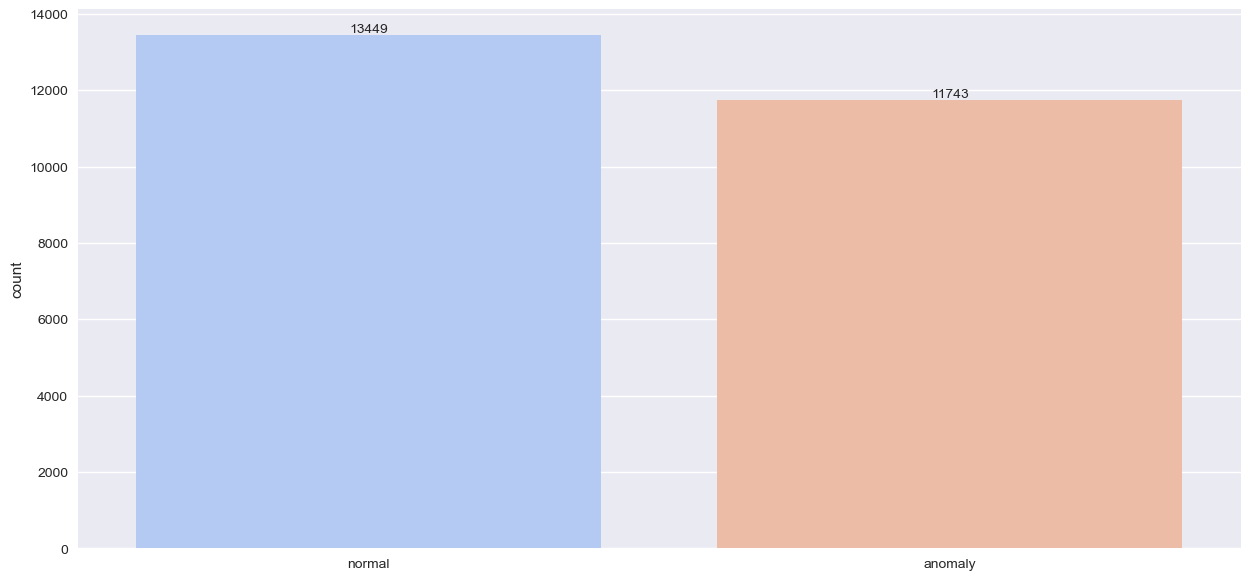

In [17]:
#Visualizing the Target Variable
ax = sns.countplot(x=uk["class"], palette=("coolwarm"))
abs_values = uk["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

UNIVARIATE ANALYSIS

Univariate Analysis was done to visualize the properties and show the distribution of the individual classes and irregularities of the variables in the data

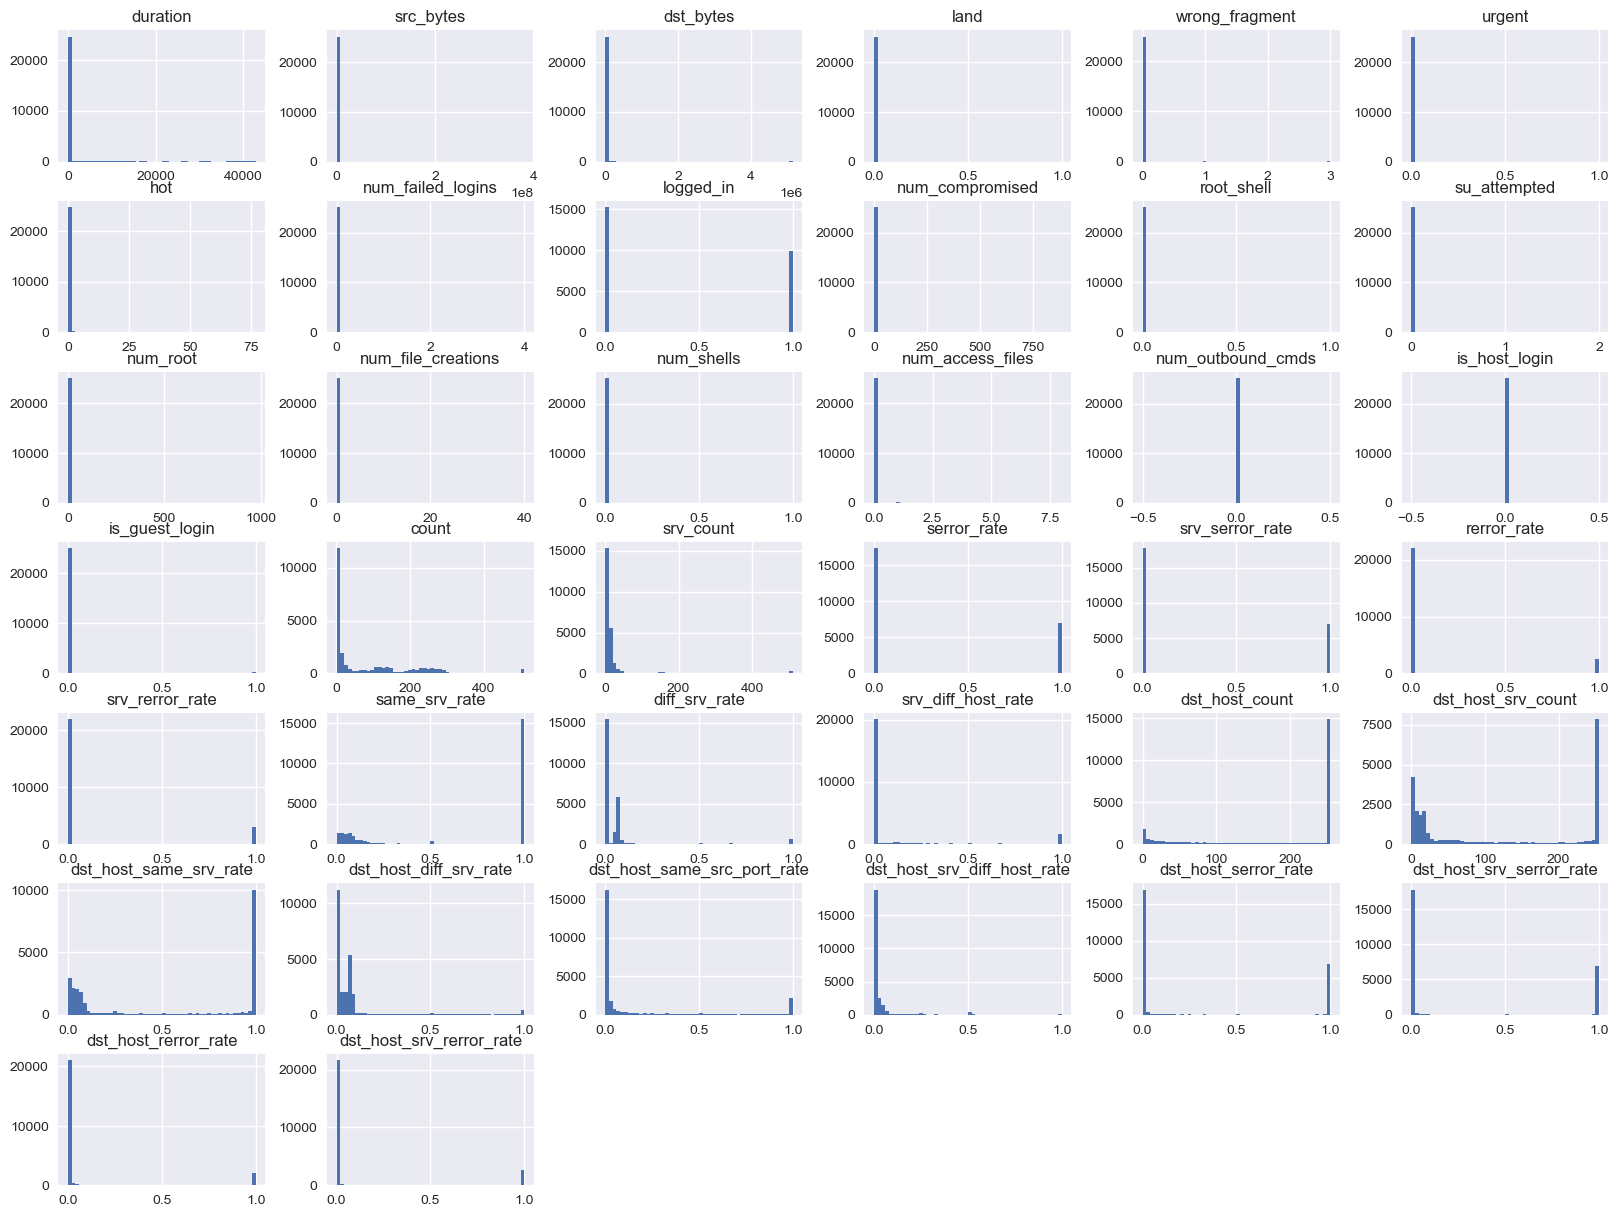

In [18]:
#visualizing the numerical columns
#histogram for each numerical columns
uk.hist(bins=50, figsize=(20,15))
plt.show()

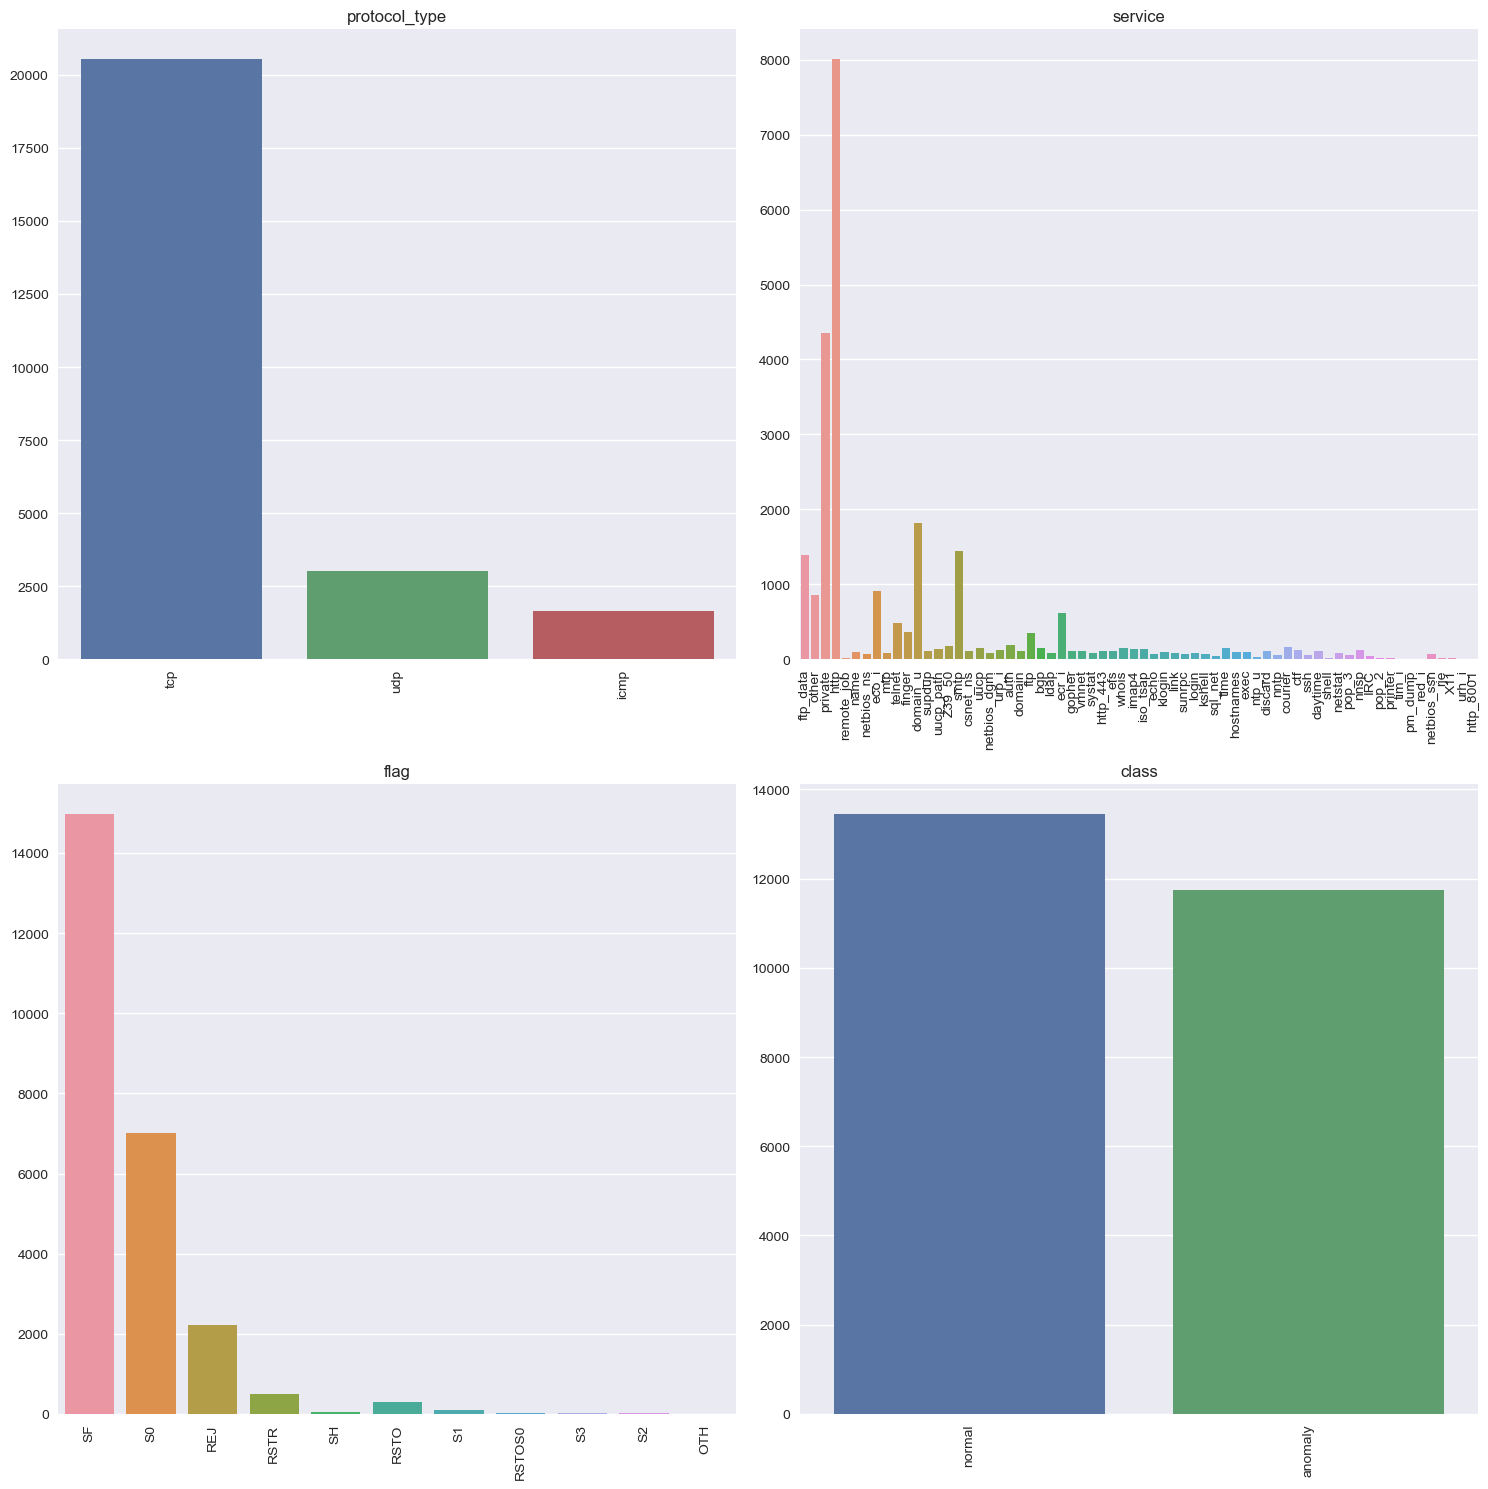

In [19]:
#visualizing categorical columns
num_plots = len(cat)
num_cols = 2
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)
 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()
 
for i, col in enumerate(cat):
    sns.countplot(x=col, data=uk, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
for i in range(num_plots, num_rows*num_cols):
    axes[i].set_visible(False)
fig.tight_layout()
plt.show()

BIVARIATE ANALYSIS

Bivariate analysis was also done to see the relationship between each of the feature against the target variable.

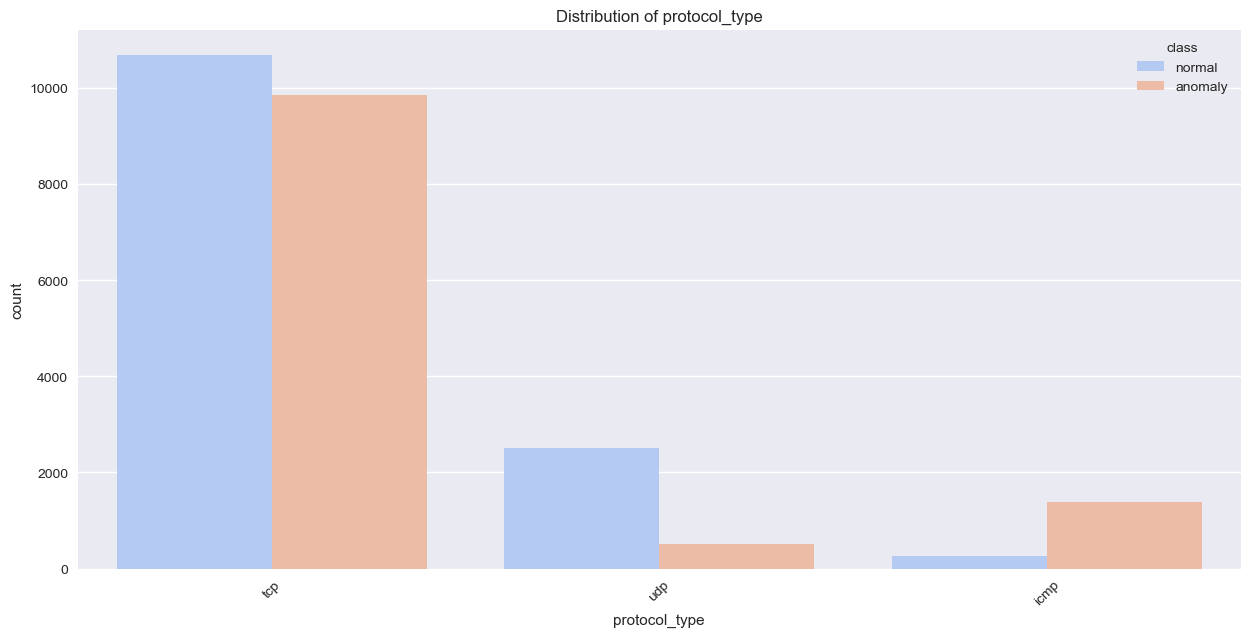

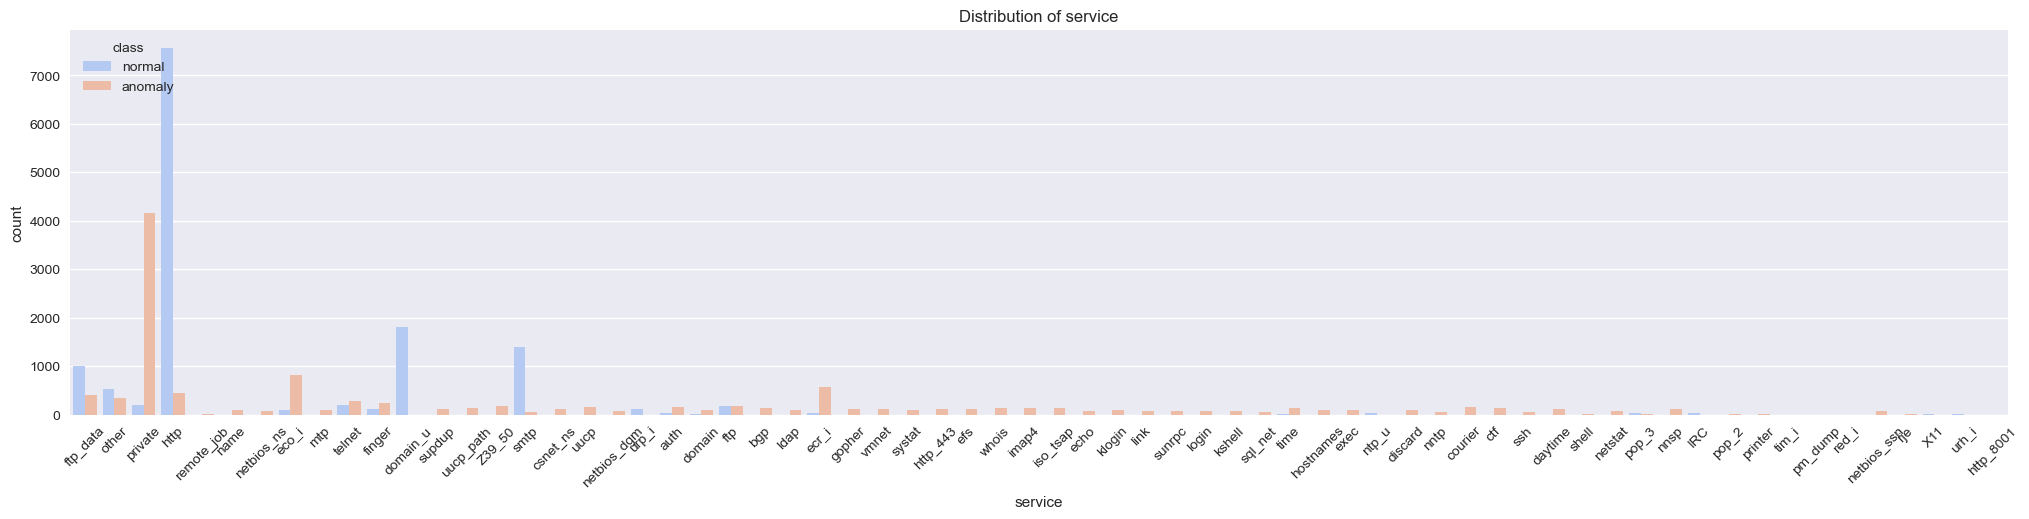

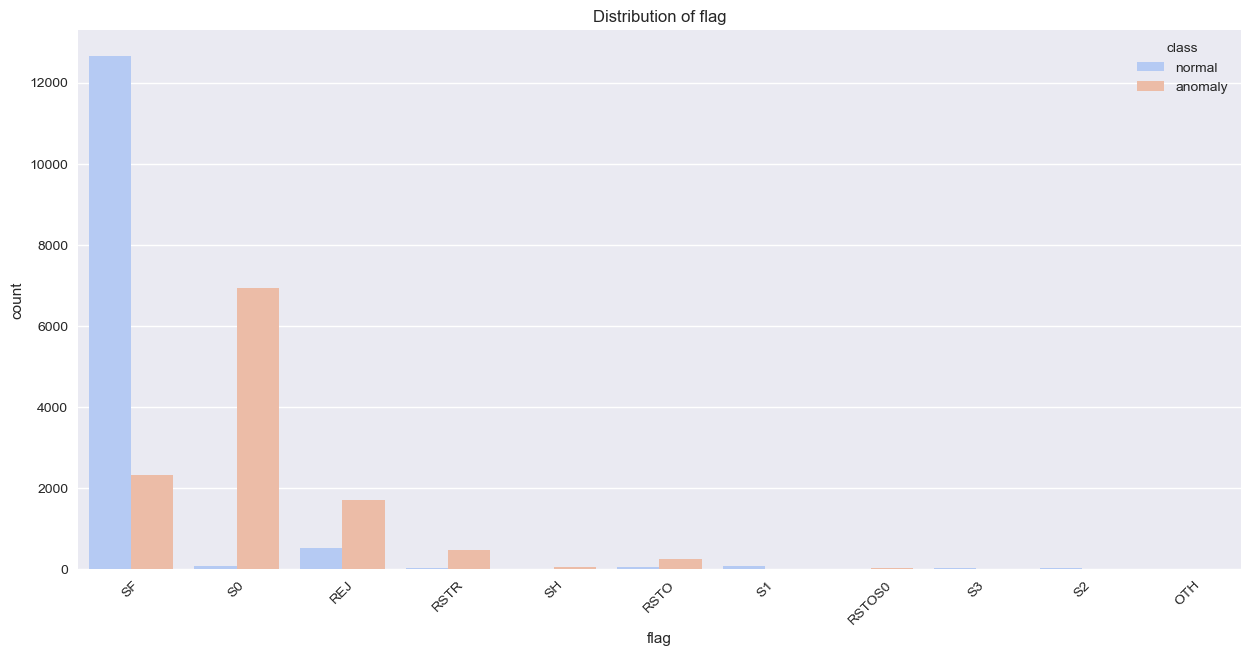

In [20]:
# Bivariate Analysis 
for category in ['protocol_type', 'service', 'flag']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    sns.countplot(x=category, data=uk, hue='class', palette=("coolwarm"))
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.show()

ENCODING

In [21]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(uk)
label_encoding(uk_test)

uk.drop(['num_outbound_cmds'], axis=1, inplace=True)
uk_test.drop(['num_outbound_cmds'], axis=1, inplace=True)
     
uk.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


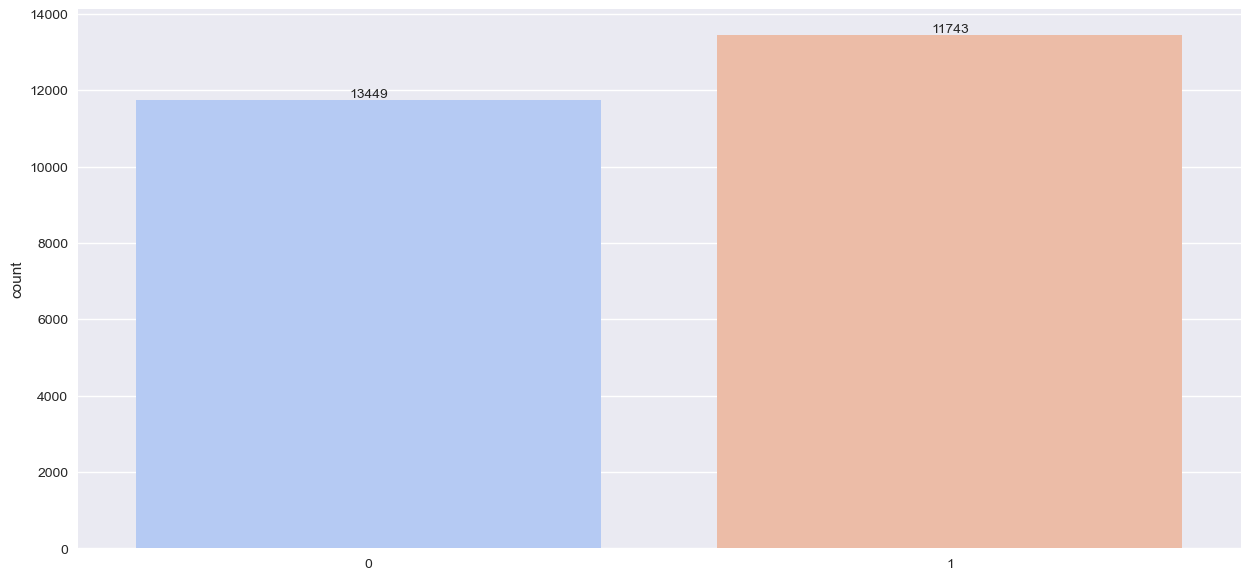

In [22]:
#Visualizing the Target Variable
ax = sns.countplot(x=uk["class"], palette=("coolwarm"))
abs_values = uk["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['0', '1'])

plt.xlabel(None)
plt.show()

CORRELATION

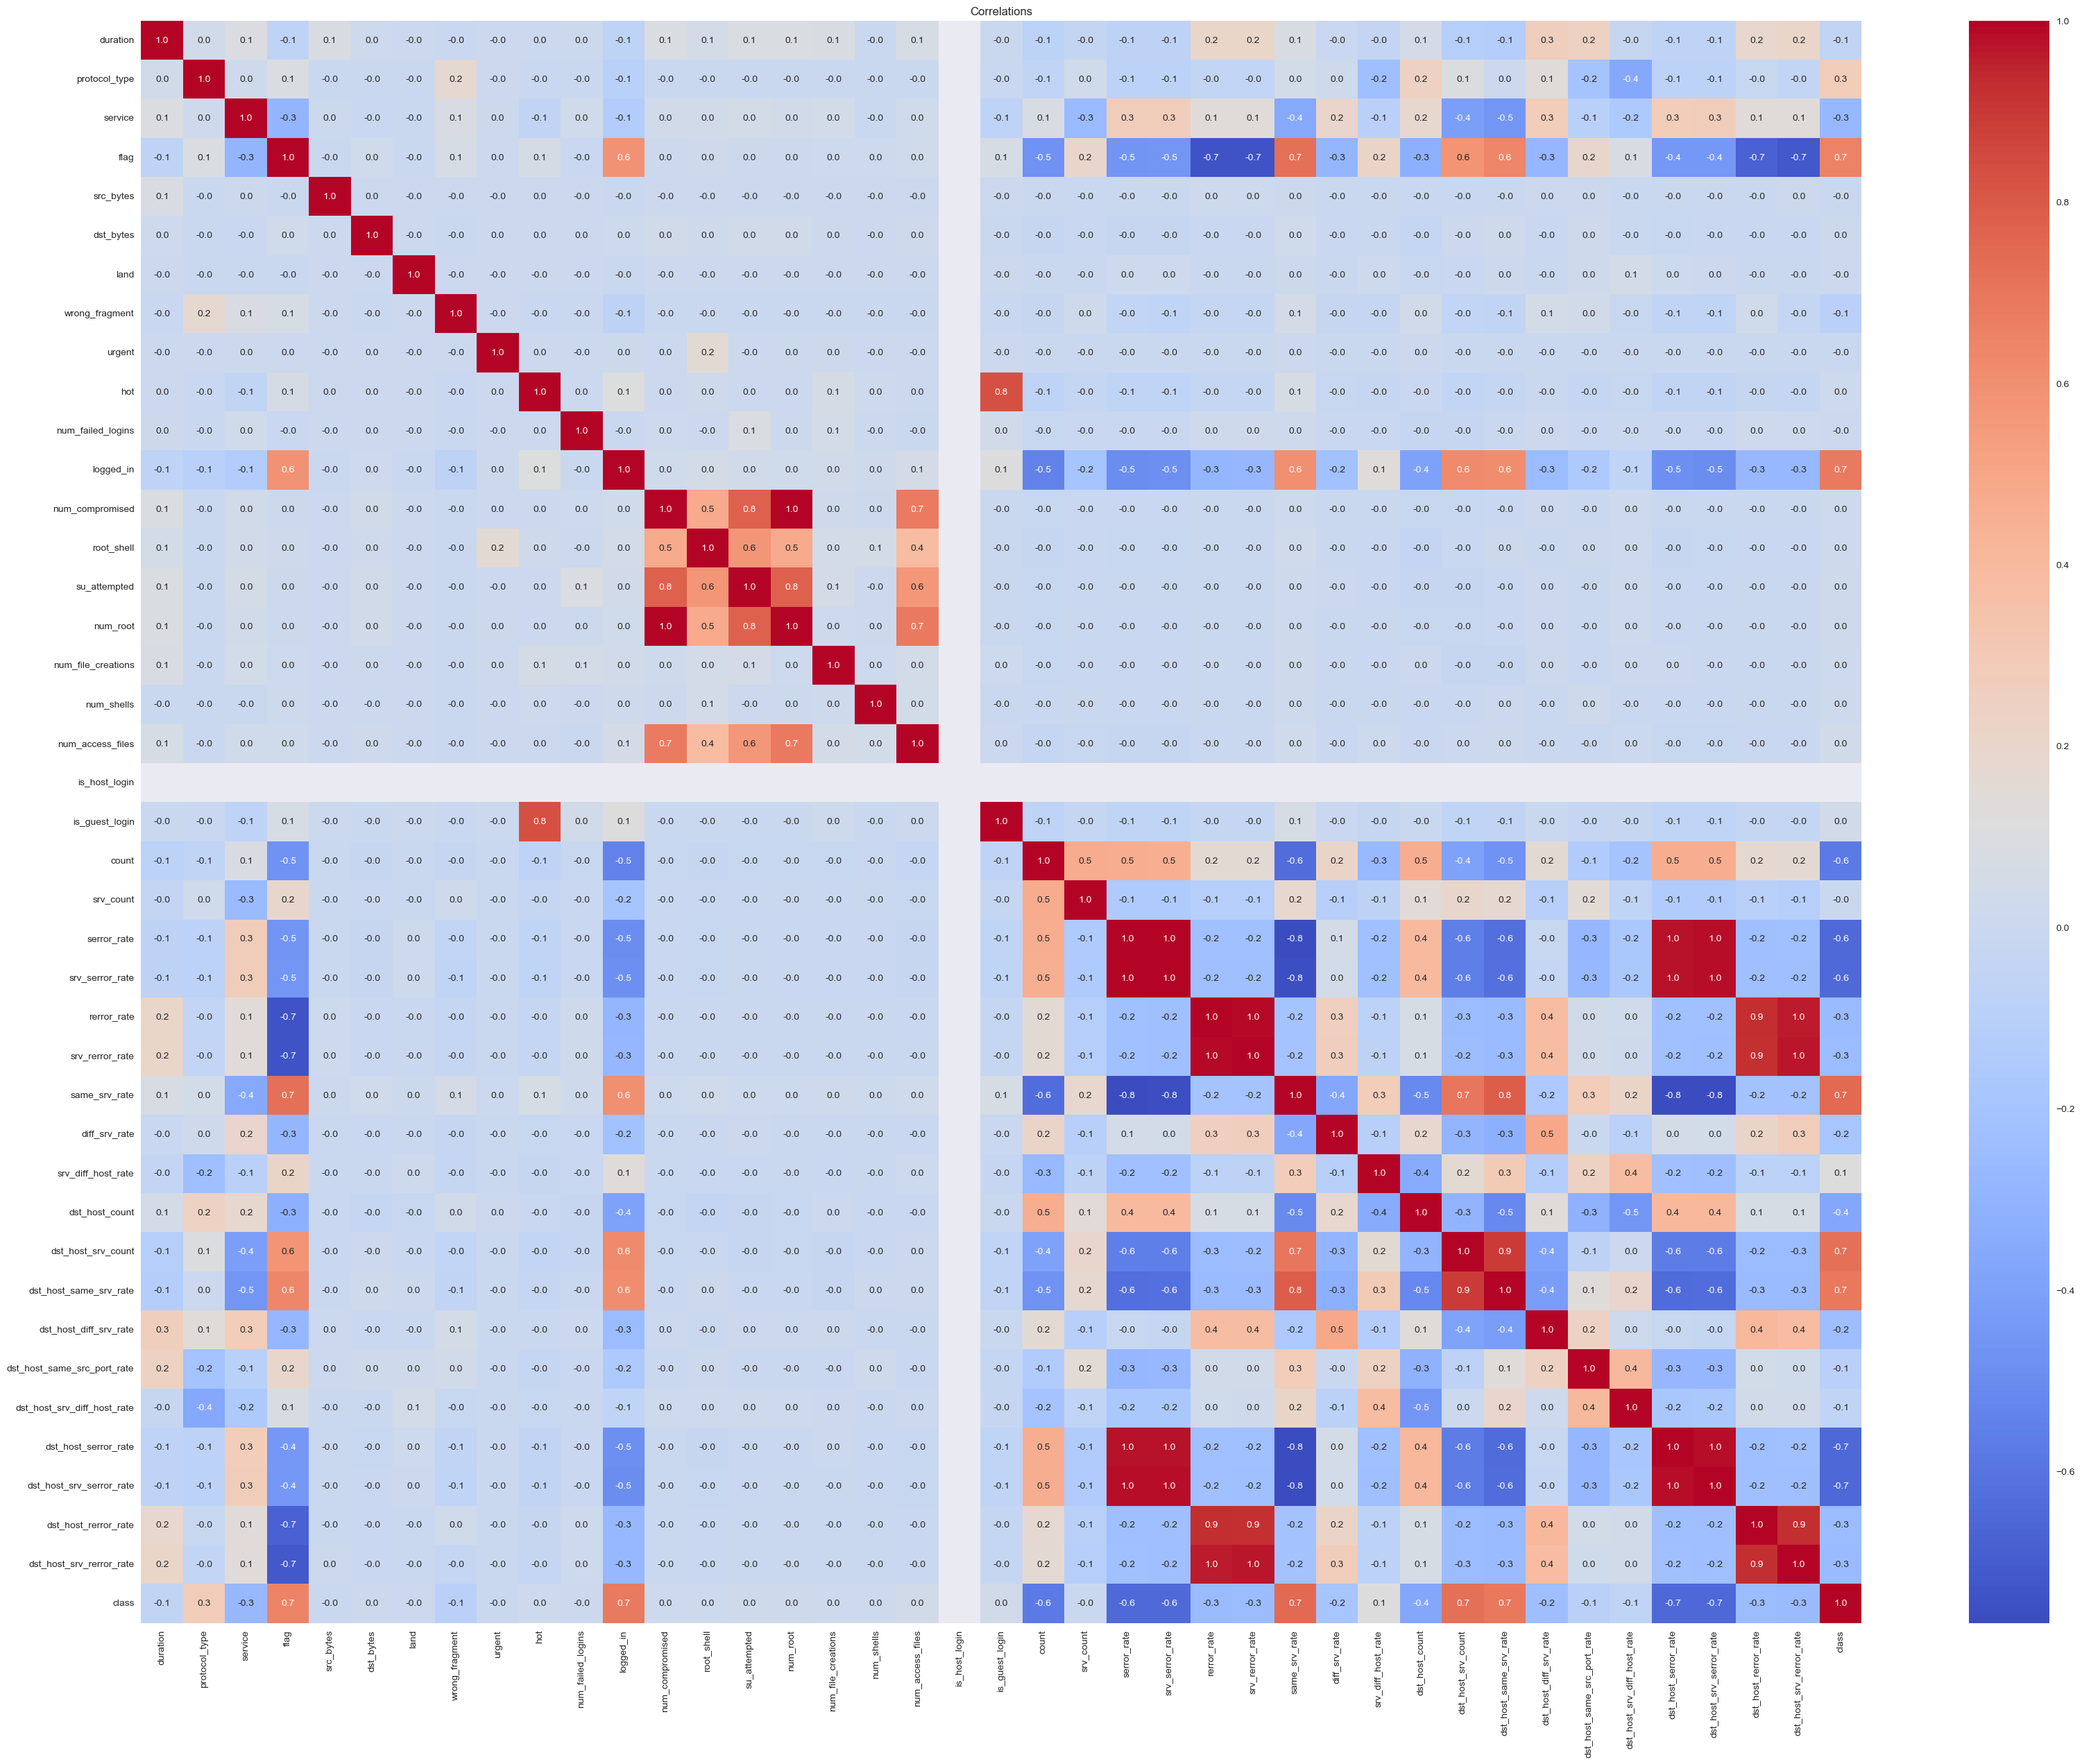

In [23]:
plt.figure(figsize=(40, 30))
sns.heatmap(uk.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlations')
plt.show()

Index(['flag', 'hot', 'num_compromised', 'su_attempted', 'num_root',
       'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


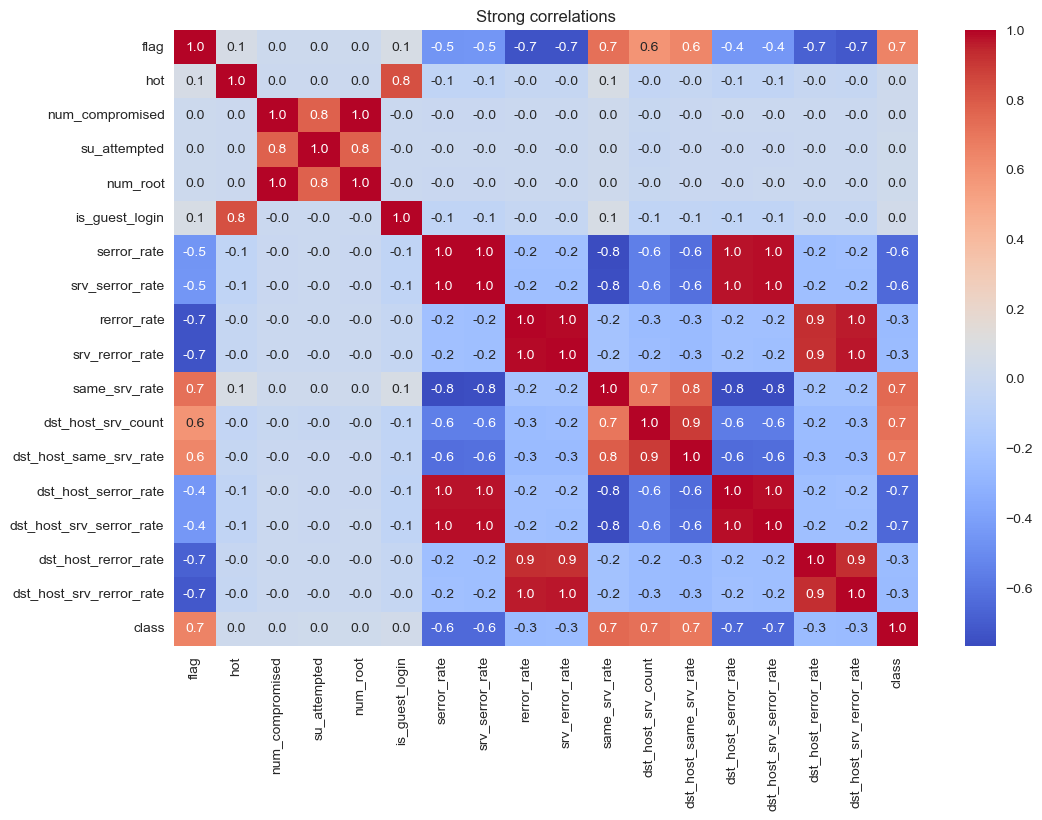

In [24]:
# only strong correlations
corr_matrix = uk.corr()
threshold = 0.7

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

print(filtered_columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Strong correlations')
plt.show()

DATA SPLITTING

In [25]:
from sklearn.model_selection import train_test_split

# Assuming 'uk' is your DataFrame and 'class' is the target variable
X = uk.drop('class', axis=1)  # Features (all columns except 'class')
y = uk['class']  # Target variable

In [26]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,1,19,9,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,1,46,1,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,1,38,5,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [27]:
y

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int32

In [28]:
#Feature selection using the Recursive Feature Elimination (RFE) algorithm with a Random Forest Classifier as the estimator

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

rf = RandomForestClassifier()

rfe = RFE(rf, n_features_to_select=10)
rfe = rfe.fit(X, y)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [30]:
X = X[selected_features]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#youkay = pd.concat([X_train, y_train], axis=1)
# Save the train data to a CSV file
#youkay.to_csv('youkay.csv', index=False)

In [32]:
# checking the shape of the train and test datasets

print("The shape of X_train is: ",X_train.shape)
print("The shape of X_test is: ",X_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of X_train is:  (17634, 10)
The shape of X_test is:  (7558, 10)
The shape of y_train is:  (17634,)
The shape of y_test is:  (7558,)


In [33]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test= scaler.transform(X_test)


MODEL IMPLEMENTATION

In [34]:
#Import the libraries for the model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import time

In [35]:
#Applying a basline model
base = DummyClassifier(strategy = "constant", constant = 0)
base.fit(X_train, y_train)
y_pred_base = base.predict(X_test)

print(f"Your baseline model achieves accuracy = {accuracy_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves f1 = {f1_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves roc_auc = {roc_auc_score(y_test, y_pred_base)}")

Your baseline model achieves accuracy = 0.4652024345064832
Your baseline model achieves f1 = 0.0
Your baseline model achieves roc_auc = 0.5


The Baseline is completely Random and it achieves accuracy of 46.93%, the model needs to be above this for a good prediction I will proceed to apply the models on the scaled data

In [36]:
# Initialize models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
gb = GradientBoostingClassifier()
svm = SVC() 


# Add Isolation Forest and LOF to the list of models
model_list = [lr, dt, rf, gnb, gb, svm]

train_acc = []
test_acc = []

for model in model_list:
    # Fit the model
    model.fit(X_train, y_train)

    # Predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracy scores to lists
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

# Display results
for i, model in enumerate(model_list):
    print(f"Model: {type(model).__name__}")
    print(f"Training Accuracy: {train_acc[i]}")
    print(f"Testing Accuracy: {test_acc[i]}")
    print("\n")

Model: LogisticRegression
Training Accuracy: 0.9257116933197233
Testing Accuracy: 0.9318602804974861


Model: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9955014554114845


Model: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9977507277057422


Model: GaussianNB
Training Accuracy: 0.893671316774413
Testing Accuracy: 0.9011643291876158


Model: GradientBoostingClassifier
Training Accuracy: 0.9946126800499036
Testing Accuracy: 0.9935168033871394


Model: SVC
Training Accuracy: 0.9688669615515482
Testing Accuracy: 0.971024080444562




In [37]:
models = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gaussian Naive Bayes','GradientBoostingClassifier', 'SVC']

In [38]:
#Genrating the classification report for each algorithm used
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb,
    'GradientBoostingClassifier': gb,
    'SVC':svm
}
 
# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3516
           1       0.92      0.96      0.94      4042

    accuracy                           0.93      7558
   macro avg       0.93      0.93      0.93      7558
weighted avg       0.93      0.93      0.93      7558

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3516
           1       1.00      0.99      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       1.00      1.00      1.00      4042

    accuracy                           1.00      7558
  

In [39]:
#Generating the confusion matrices for all the algorithms
models = [lr, dt, rf, gnb, gb, svm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'GradientBoostingClassifier', 'SVC']
 
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

Confusion Matrix - Logistic Regression:
[[3182  334]
 [ 181 3861]]

Confusion Matrix - Decision Tree:
[[3506   10]
 [  24 4018]]

Confusion Matrix - Random Forest:
[[3507    9]
 [   8 4034]]

Confusion Matrix - Gaussian Naive Bayes:
[[2965  551]
 [ 196 3846]]

Confusion Matrix - GradientBoostingClassifier:
[[3487   29]
 [  20 4022]]

Confusion Matrix - SVC:
[[3362  154]
 [  65 3977]]



In [40]:
#Tabulating the accuracy score for all the models based on the training and test sets.
model_summary = pd.DataFrame({'Model':model_names,'Train Score':train_acc,'Test Score':test_acc})
model_summary

,Model,Train Score,Test Score
0,Logistic Regression,0.925712,0.931860
1,Decision Tree,1.000000,0.995501
2,Random Forest,1.000000,0.997751
3,Gaussian Naive Bayes,0.893671,0.901164
4,GradientBoostingClassifier,0.994613,0.993517
5,SVC,0.968867,0.971024


In [41]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


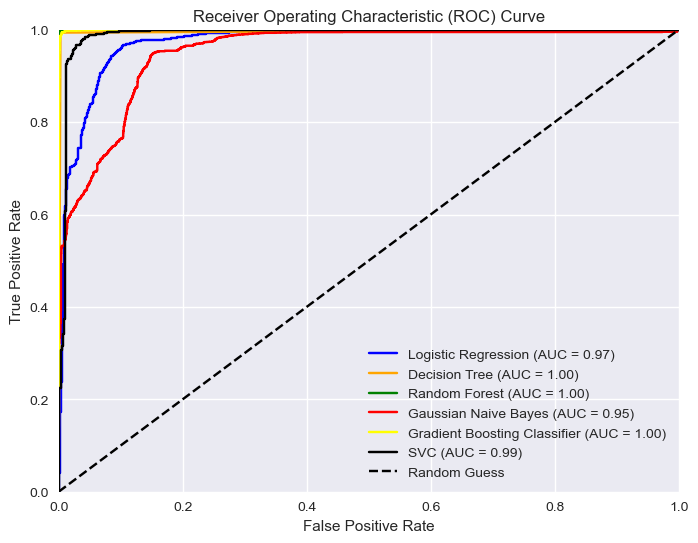

In [42]:
# Define a list of Machine Learning models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
gb = GradientBoostingClassifier()
svm = SVC(probability=True)  # Enable probability estimates for SVC

model_list = [lr, dt, rf, gnb, gb, svm]

# Define a list of corresponding model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes',
               'Gradient Boosting Classifier', 'SVC']
colors = ['blue', 'orange', 'green', 'red', 'yellow', 'black']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))
    
#Add a dashed line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
#Set the x and y axis limits to [0, 1]
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [43]:
from tabulate import tabulate
 
# Train and evaluate Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Train and evaluate Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Train and evaluate Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Train and evaluate Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)

# Train and evaluate Gradient Boosting Classifier model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Train and evaluate Support Vector Machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Calculate precision, recall, and F1 score for each model
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

gnb_precision = precision_score(y_test, gnb_predictions)
gnb_recall = recall_score(y_test, gnb_predictions)
gnb_f1 = f1_score(y_test, gnb_predictions)

gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

# Calculate precision, recall, and F1 score for each model

lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
gnb_precision = precision_score(y_test, gnb_predictions)
gnb_recall = recall_score(y_test, gnb_predictions)
gnb_f1 = f1_score(y_test, gnb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

# Create a dictionary with the desired metrics
results = {

    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian NB', 'Gradient Boosting Classifier', 'Support Vector Machine'],
    'Test Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy, gnb_accuracy, gb_accuracy, svm_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision, gnb_precision, gb_precision, svm_precision],
    'Recall': [lr_recall, dt_recall, rf_recall, gnb_recall, gb_recall, svm_recall],
    'F1 Score': [lr_f1, dt_f1, rf_f1, gnb_f1, gb_f1, svm_f1]

}
 
# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(results)
 
# Display the DataFrame
print(tabulate(df_results, headers='keys', tablefmt='psql'))

+----+------------------------------+-----------------+-------------+----------+------------+
|    | Model                        |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+------------------------------+-----------------+-------------+----------+------------|
|  0 | Logistic Regression          |        0.93186  |    0.920381 | 0.95522  |   0.937477 |
|  1 | Decision Tree                |        0.995766 |    0.998013 | 0.994062 |   0.996034 |
|  2 | Random Forest                |        0.997486 |    0.997035 | 0.998268 |   0.997651 |
|  3 | Gaussian NB                  |        0.901164 |    0.874687 | 0.951509 |   0.911482 |
|  4 | Gradient Boosting Classifier |        0.993517 |    0.992841 | 0.995052 |   0.993945 |
|  5 | Support Vector Machine       |        0.971024 |    0.962721 | 0.983919 |   0.973204 |
+----+------------------------------+-----------------+-------------+----------+------------+


MODEL OPTIMIZATION

In [44]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [45]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [46]:
def objective(trial):
    # Define hyperparameters for Random Forest Classifier
    rfc_params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
    }

    # Initialize Random Forest Classifier with hyperparameters
    rfc = RandomForestClassifier(**rfc_params)

    # Train the model
    rfc.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy
print('Best hyperparameters: ', study.best_params)
print('Best accuracy: ', study.best_value)

# Train the model with the best hyperparameters
best_rfc = RandomForestClassifier(**study.best_params)
best_rfc.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Best model accuracy: ', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best hyperparameters:  {'n_estimators': 93, 'max_depth': 24, 'min_samples_split': 6}
Best accuracy:  0.9981476581106112
Best model accuracy:  0.997618417570786
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       1.00      1.00      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

Confusion Matrix:
[[3506   10]
 [   8 4034]]


In [47]:

def objective(trial):
    # Define hyperparameters for Logistic Regression
    lrc_params = {
        'C': trial.suggest_float('C', 0.1, 10.0, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
    }

    # Initialize Logistic Regression with hyperparameters
    lrc = LogisticRegression(**lrc_params)

    # Train the model
    lrc.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = lrc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy
print('Best hyperparameters: ', study.best_params)
print('Best accuracy: ', study.best_value)

# Train the model with the best hyperparameters
best_lrc = LogisticRegression(**study.best_params)
best_lrc.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_lrc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Best model accuracy: ', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best hyperparameters:  {'C': 0.21336835621215242, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy:  0.9323895210373114
Best model accuracy:  0.9323895210373114
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3516
           1       0.92      0.96      0.94      4042

    accuracy                           0.93      7558
   macro avg       0.93      0.93      0.93      7558
weighted avg       0.93      0.93      0.93      7558

Confusion Matrix:
[[3181  335]
 [ 176 3866]]


In [48]:
def objective(trial):
    # Define hyperparameters for Decision Tree Classifier
    dtc_params = {
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
    }

    # Initialize Decision Tree Classifier with hyperparameters
    dtc = DecisionTreeClassifier(**dtc_params)

    # Train the model
    dtc.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy
print('Best hyperparameters: ', study.best_params)
print('Best accuracy: ', study.best_value)

# Train the model with the best hyperparameters
best_dtc = DecisionTreeClassifier(**study.best_params)
best_dtc.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Best model accuracy: ', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best hyperparameters:  {'max_depth': 20, 'min_samples_split': 7, 'criterion': 'entropy'}
Best accuracy:  0.9961630060862662
Best model accuracy:  0.9957660756813972
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       1.00      1.00      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

Confusion Matrix:
[[3501   15]
 [  17 4025]]


In [49]:
def objective(trial):
    # Define hyperparameters for Gradient Boosting Classifier
    gbc_params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
    }

    # Initialize Gradient Boosting Classifier with hyperparameters
    gbc = GradientBoostingClassifier(**gbc_params)

    # Train the model
    gbc.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = gbc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy
print('Best hyperparameters: ', study.best_params)
print('Best accuracy: ', study.best_value)

# Train the model with the best hyperparameters
best_gbc = GradientBoostingClassifier(**study.best_params)
best_gbc.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Best model accuracy: ', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best hyperparameters:  {'n_estimators': 96, 'max_depth': 9, 'learning_rate': 0.7159560894435119}
Best accuracy:  0.9980153479756549
Best model accuracy:  0.9974861074358295
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       1.00      1.00      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

Confusion Matrix:
[[3508    8]
 [  11 4031]]


In [50]:
def objective(trial):
    # Define hyperparameters for SVM Classifier
    svmc_params = {
        'C': trial.suggest_float('C', 0.1, 10.0, log=True),
        'gamma': trial.suggest_float('gamma', 0.001, 1.0, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
    }

    # Initialize SVM Classifier with hyperparameters
    svmc = SVC(**svmc_params)

    # Train the model
    svmc.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = svmc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy
print('Best hyperparameters: ', study.best_params)
print('Best accuracy: ', study.best_value)

# Train the model with the best hyperparameters
best_svmc = SVC(**study.best_params)
best_svmc.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_svmc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Best model accuracy: ', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best hyperparameters:  {'C': 8.238749570831752, 'gamma': 0.5910436958789836, 'kernel': 'poly'}
Best accuracy:  0.9824027520508071
Best model accuracy:  0.9824027520508071
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3516
           1       0.99      0.98      0.98      4042

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558

Confusion Matrix:
[[3462   54]
 [  79 3963]]


In [51]:
def objective(trial):
    # Initialize Gaussian Naive Bayes Classifier
    gnbc = GaussianNB()

    # Train the model
    gnbc.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = gnbc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best accuracy
print('Best accuracy: ', study.best_value)

# Train the model with the best hyperparameters
best_gnbc = GaussianNB()
best_gnbc.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_gnbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Best model accuracy: ', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best accuracy:  0.9011643291876158
Best model accuracy:  0.9011643291876158
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      3516
           1       0.87      0.95      0.91      4042

    accuracy                           0.90      7558
   macro avg       0.91      0.90      0.90      7558
weighted avg       0.90      0.90      0.90      7558

Confusion Matrix:
[[2965  551]
 [ 196 3846]]


In [52]:
from tabulate import tabulate
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit the models and make predictions
y_pred = [model.fit(X_train, y_train).predict(X_test) for model in models]

# Calculate probabilities for models that support predict_proba
y_pred_proba = []
for model in models:
    if hasattr(model, 'predict_proba'):
        y_pred_proba.append(model.predict_proba(X_test)[:, 1])
    else:
        y_pred_proba.append(None)

# Calculate metrics
accuracy = [accuracy_score(y_test, y_pred_i) for y_pred_i in y_pred]
precision = [precision_score(y_test, y_pred_i) for y_pred_i in y_pred]
recall = [recall_score(y_test, y_pred_i) for y_pred_i in y_pred]
f1 = [f1_score(y_test, y_pred_i) for y_pred_i in y_pred]
auc_scores = [roc_auc_score(y_test, y_pred_proba_i) if y_pred_proba_i is not None else None for y_pred_proba_i in y_pred_proba]



# Create a dictionary with the desired metrics
results = {
    'Model': model_names,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC Score': auc_scores
}

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
print(tabulate(df_results, headers='keys', tablefmt='psql'))

+----+------------------------------+------------+-------------+----------+------------+-------------+
|    | Model                        |   Accuracy |   Precision |   Recall |   F1 Score |   AUC Score |
|----+------------------------------+------------+-------------+----------+------------+-------------|
|  0 | Logistic Regression          |   0.93186  |    0.920381 | 0.95522  |   0.937477 |    0.97425  |
|  1 | Decision Tree                |   0.995634 |    0.998012 | 0.993815 |   0.995909 |    0.99577  |
|  2 | Random Forest                |   0.997883 |    0.998021 | 0.998021 |   0.998021 |    0.99981  |
|  3 | Gaussian Naive Bayes         |   0.901164 |    0.874687 | 0.951509 |   0.911482 |    0.950998 |
|  4 | Gradient Boosting Classifier |   0.993384 |    0.992596 | 0.995052 |   0.993823 |    0.99944  |
|  5 | SVC                          |   0.971024 |    0.962721 | 0.983919 |   0.973204 |  nan        |
+----+------------------------------+------------+-------------+---------

In [53]:
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(**{k: v for k, v in study.best_params.items() if k in ['n_estimators', 'max_depth', 'min_samples_split', 'criterion']})
dtc = DecisionTreeClassifier(**{k: v for k, v in study.best_params.items() if k in ['max_depth', 'min_samples_split', 'criterion']})
gbc = GradientBoostingClassifier(**{k: v for k, v in study.best_params.items() if k in ['n_estimators', 'max_depth', 'learning_rate']})
lrc = LogisticRegression(**{k: v for k, v in study.best_params.items() if k in ['C', 'penalty', 'solver']})
# Initialize SVM with probability estimation
svmc = SVC(probability=True, **{k: v for k, v in study.best_params.items() if k in ['C', 'gamma', 'kernel']})
gnbc = GaussianNB()
# Initialize the models
models = [rfc, dtc, gbc, gnbc, svmc, lrc]
model_names = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'Gaussian NB', 'SVM', 'Logistic Regression']

# Fit the models and make predictions
y_pred = [model.fit(X_train, y_train).predict(X_test) for model in models]

# Display confusion matrix for each model
for model, name, y_pred_i in zip(models, model_names, y_pred):
    cm = confusion_matrix(y_test, y_pred_i)
    print(f'Confusion Matrix for {name}:')
    print(cm)
    print()


Confusion Matrix for Random Forest:
[[3507    9]
 [   9 4033]]

Confusion Matrix for Decision Tree:
[[3509    7]
 [  28 4014]]

Confusion Matrix for Gradient Boosting:
[[3487   29]
 [  20 4022]]

Confusion Matrix for Gaussian NB:
[[2965  551]
 [ 196 3846]]

Confusion Matrix for SVM:
[[3362  154]
 [  65 3977]]

Confusion Matrix for Logistic Regression:
[[3182  334]
 [ 181 3861]]



Best hyperparameters:  {'n_estimators': 38, 'max_depth': 15, 'min_samples_split': 4, 'criterion': 'entropy', 'learning_rate': 0.3862925945608258, 'C': 5.7635089657678, 'gamma': 0.6400986506780492, 'kernel': 'poly', 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy:  0.9673193966657846


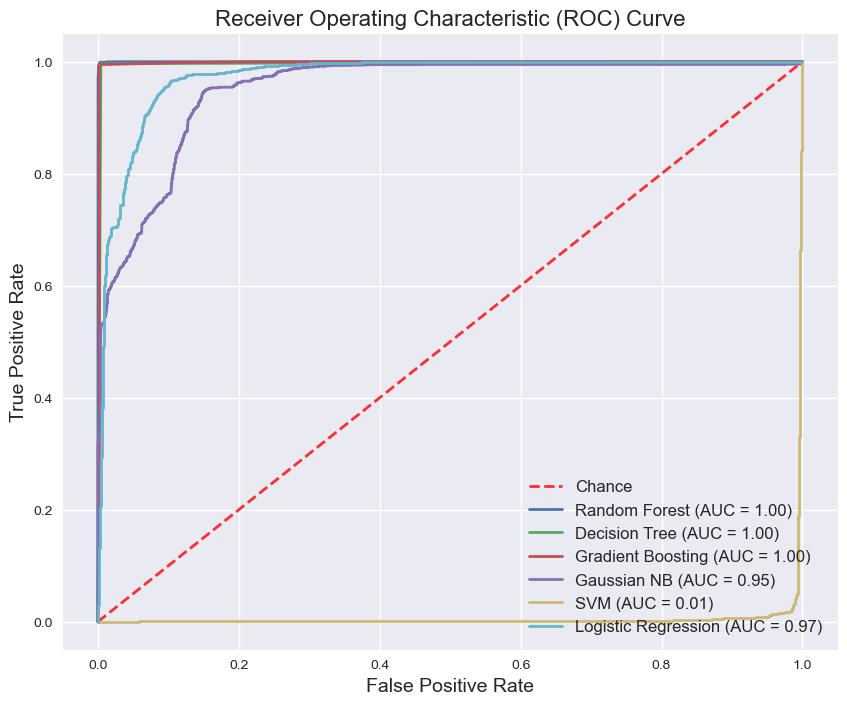

In [57]:
import optuna
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    # Define hyperparameters for Random Forest Classifier
    rfc_params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
    }

    # Define hyperparameters for Decision Tree Classifier
    dtc_params = {
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
    }

    # Define hyperparameters for Gradient Boosting Classifier
    gbc_params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
    }

    # Define hyperparameters for SVM Classifier
    svmc_params = {
        'C': trial.suggest_float('C', 0.1, 10.0, log=True),
        'gamma': trial.suggest_float('gamma', 0.001, 1.0, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
    }

    # Define hyperparameters for Logistic Regression
    lrc_params = {
        'C': trial.suggest_float('C', 0.1, 10.0, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
    }

    # Initialize models with hyperparameters
    rfc = RandomForestClassifier(**rfc_params)
    dtc = DecisionTreeClassifier(**dtc_params)
    gbc = GradientBoostingClassifier(**gbc_params)
    gnbc = GaussianNB()
    svmc = SVC(**svmc_params)
    lrc = LogisticRegression(**lrc_params)

    # Train models and evaluate using test set
    accuracies = []
    for model in [rfc, dtc, gbc, gnbc, svmc, lrc]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Return the mean accuracy across all models as the objective score
    return sum(accuracies) / len(accuracies)

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy
print('Best hyperparameters: ', study.best_params)
print('Best accuracy: ', study.best_value)

# Initialize the models with the best hyperparameters
# Initialize the models with the best hyperparameters
rfc = RandomForestClassifier(**{k: v for k, v in study.best_params.items() if k in ['n_estimators', 'max_depth', 'min_samples_split', 'criterion']})
dtc = DecisionTreeClassifier(**{k: v for k, v in study.best_params.items() if k in ['max_depth', 'min_samples_split', 'criterion']})
gbc = GradientBoostingClassifier(**{k: v for k, v in study.best_params.items() if k in ['n_estimators', 'max_depth', 'learning_rate']})
lrc = LogisticRegression(**{k: v for k, v in study.best_params.items() if k in ['C', 'penalty', 'solver']})
# Initialize SVM with probability estimation
svmc = SVC(probability=True, **{k: v for k, v in study.best_params.items() if k in ['C', 'gamma', 'kernel']})


models = [rfc, dtc, gbc, gnbc, svmc, lrc]
model_names = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'Gaussian NB', 'SVM', 'Logistic Regression']

# Calculate ROC curve and AUC for each model
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
ax.legend(loc='lower right', fontsize=12)

plt.show()

In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
 
# Create base anomaly detection models
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = SVC()
 
# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('dt', model1), ('rf', model2), ('svm', model3)], voting='hard')
 
# Train the voting classifier
voting_clf.fit(X_train, y_train)
 
# Make predictions
predictions = voting_clf.predict(X_test)
 
# Evaluate performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.997221487165917


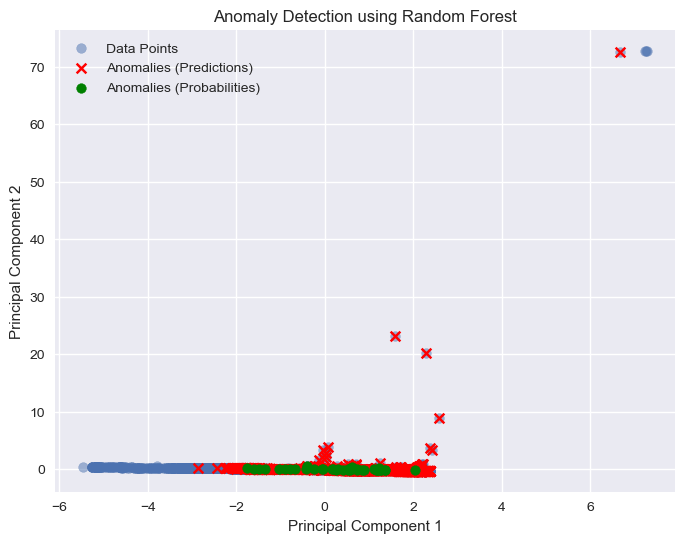

In [55]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
 
# Assuming you have the feature matrix X_test and the identified anomalies anomalies_pred and anomalies_prob
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with a random_state value
model = rfc = RandomForestClassifier(**{k: v for k, v in study.best_params.items() if k in ['n_estimators', 'max_depth', 'min_samples_split', 'criterion']})

# Fit the model
model.fit(X_train, y_train)

# Obtain probability estimates
probabilities = model.predict_proba(X_test)

# Perform PCA to reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
 
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))
 
# Assuming probabilities are obtained from some model or method
probabilities = model.predict_proba(X_test)

# Plot all data points
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.5, label='Data Points')
 
# Plot anomalies identified using predictions
ax.scatter(X_test_pca[predictions == 1, 0], X_test_pca[predictions == 1, 1], color='r', marker='x', label='Anomalies (Predictions)')
 
# Plot anomalies identified using probabilities
ax.scatter(X_test_pca[np.max(probabilities, axis=1) < threshold, 0], X_test_pca[np.max(probabilities, axis=1) < threshold, 1], color='g', marker='o', label='Anomalies (Probabilities)')
 
# Add legend and axis labels
ax.legend()
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Anomaly Detection using Random Forest')
 
# Show the plot
plt.show()

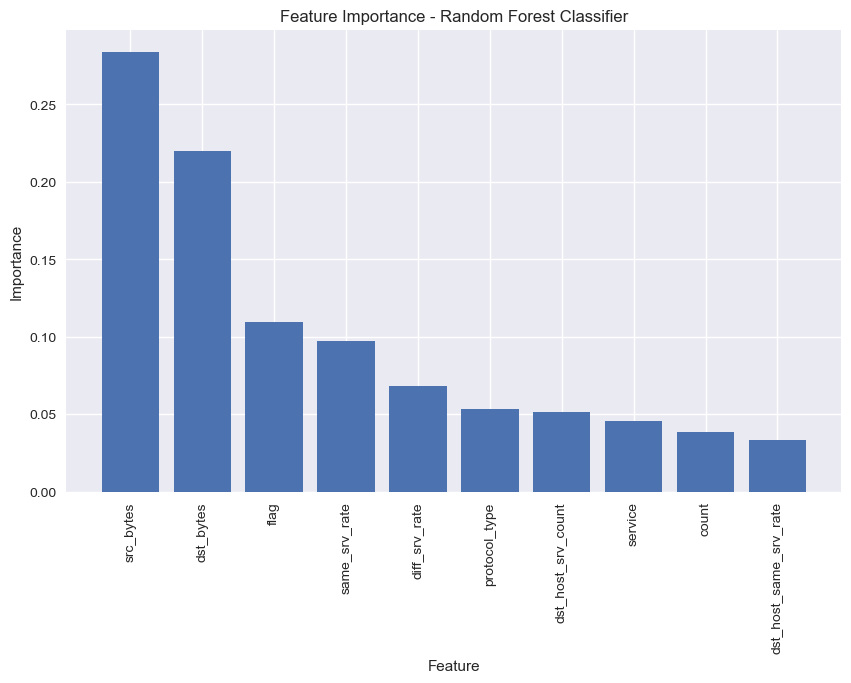

In [56]:
# Train the model with the best hyperparameters
best_rfc = RandomForestClassifier(**study.best_params)
best_rfc.fit(X_train, y_train)

# Get feature importances
feature_importances = best_rfc.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest Classifier')
plt.show()



In [60]:
from joblib import dump
rfc_classifier = RandomForestClassifier(**{k: v for k, v in study.best_params.items() if k in ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'criterion']})
# Fit the model
rfc_classifier.fit(X_train, y_train)
# Save the model
dump(best_rfc, 'uk1.joblib')

['uk1.joblib']